<img style="width:80%; height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/08_Logistic_Regression_Binary_Classification/excercise/logistic_regression_excercise.png">

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as ts, keras

2024-08-20 13:39:02.745777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 13:39:02.784195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 13:39:02.793931: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 13:39:04.564866: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


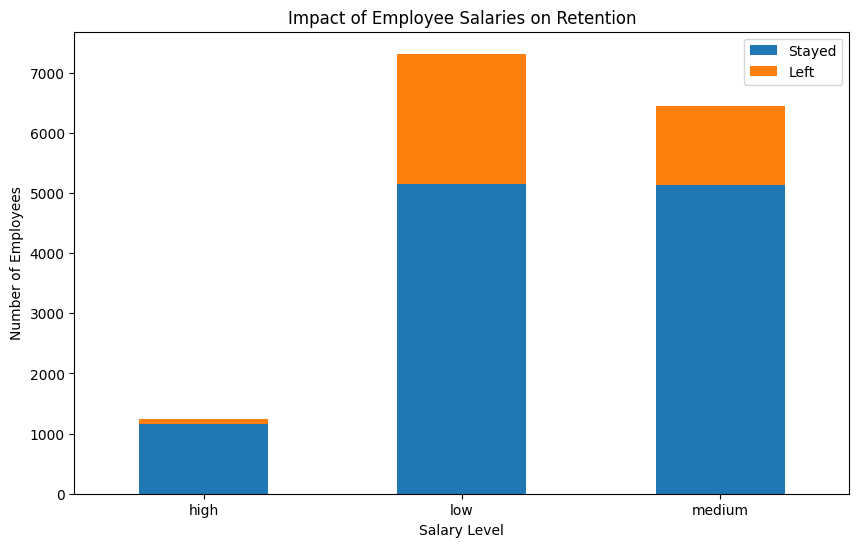

In [42]:
#Effect of Salaries on Retention
salary_effect_retention = df.groupby(['salary', 'left']).size().unstack()
salary_effect_retention.columns = ['Stayed', 'Left']
salary_effect_retention.plot(kind='bar', stacked=True ,figsize=(10,6) )
plt.title('Impact of Employee Salaries on Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

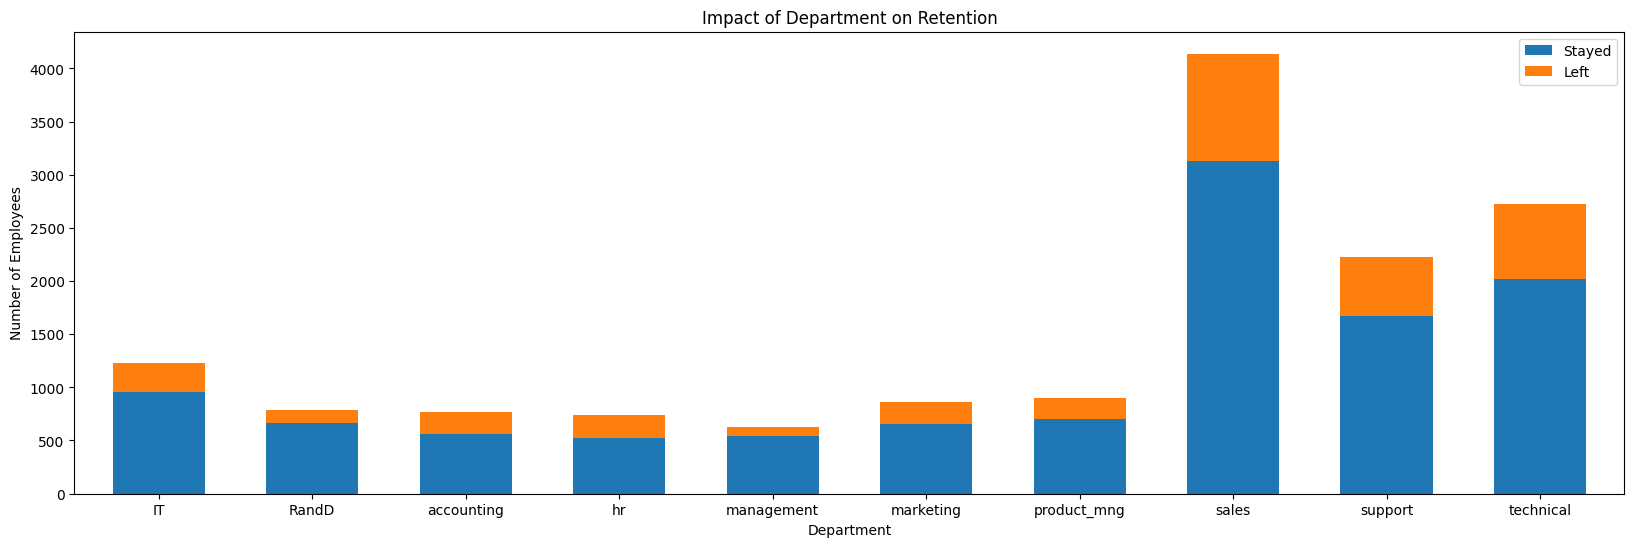

In [46]:
#Effect of Department on retention
department_effect_retention = df.groupby(['Department','left']).size().unstack()
department_effect_retention.columns = ['Stayed', 'Left']
department_effect_retention.plot(kind='bar',stacked=True, width=0.6, figsize=(20,6))
plt.title('Impact of Department on Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

In [47]:
#Effect of Satisfaction Level on retention
correlation_left = df['satisfaction_level'].corr(df['left'] == 1)
correlation_stayed = df['satisfaction_level'].corr(df['left'] == 0)
print(f'Correlation between satisfaction level and employee left: {correlation_left}')
print(f'Correlation between satisfaction level and employee Stayed: {correlation_stayed}')

Correlation between satisfaction level and employee left: -0.3883749834241141
Correlation between satisfaction level and employee Stayed: 0.38837498342411414


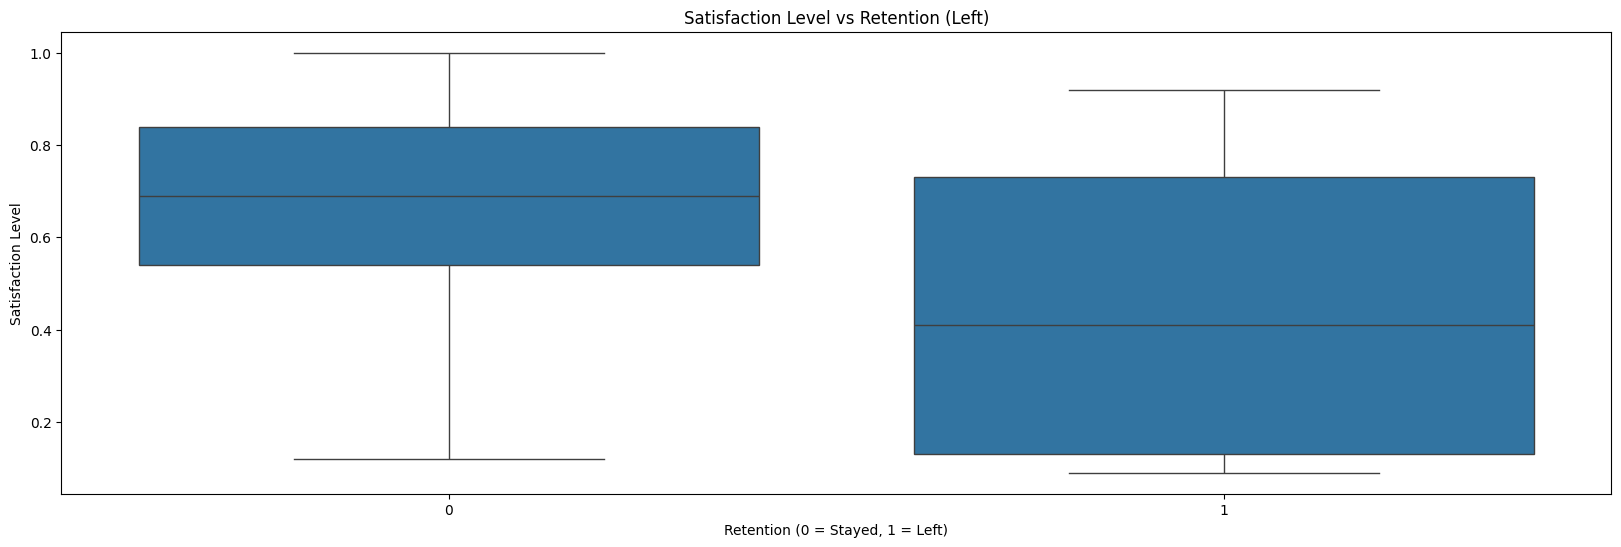

In [38]:
# Box plot to visualize the relationship
plt.figure(figsize=(20, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs Retention (Left)')
plt.xlabel('Retention (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.show()

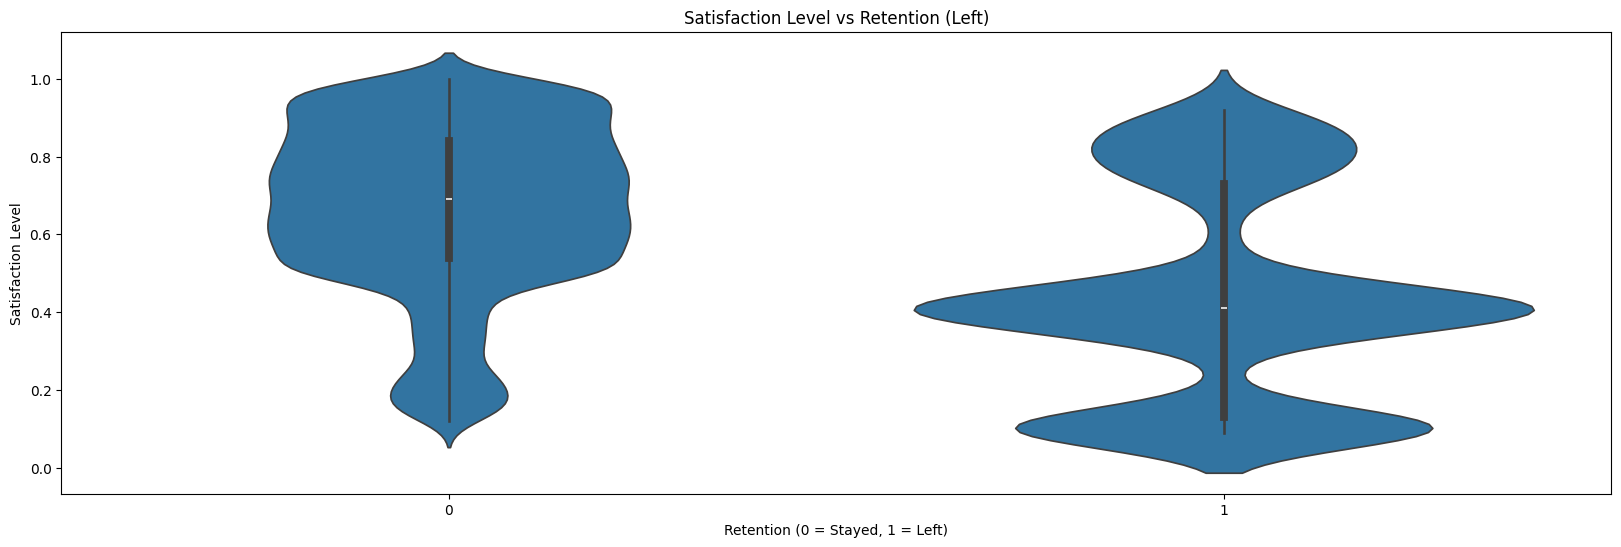

In [39]:
# Violin plot to visualize the relationship
plt.figure(figsize=(20, 6))
sns.violinplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs Retention (Left)')
plt.xlabel('Retention (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.show()

In [68]:
#Correlation between Promotion and Retention
df['promotion_last_5years'].corr(df['left'])

-0.061788106579200794

In [69]:
#Correlation between Number of projects and Retention
df['number_project'].corr(df['left'])

0.023787185071774148

In [71]:
#Correlation between time spend in company & Retention
df['time_spend_company'].corr(df['left'])

0.14482217493938584

In [72]:
df['average_montly_hours'].corr(df['left'])

0.07128717878330114

In [73]:
df['last_evaluation'].corr(df['left'])

0.00656712044753405

In [75]:
salary_categorised = ['low','medium','high']

In [77]:
oe = OrdinalEncoder(categories=[salary_categorised])

In [78]:
df['salary'] = oe.fit_transform(df[['salary']])

In [82]:
new_df = df.drop(columns=['Department','Work_accident','last_evaluation','average_montly_hours','number_project'])
new_df

,satisfaction_level,time_spend_company,left,promotion_last_5years,salary
0,0.38,3,1,0,0.0
1,0.80,6,1,0,1.0
2,0.11,4,1,0,1.0
3,0.72,5,1,0,0.0
4,0.37,3,1,0,0.0
...,...,...,...,...,...
14994,0.40,3,1,0,0.0
14995,0.37,3,1,0,0.0
14996,0.37,3,1,0,0.0
14997,0.11,4,1,0,0.0


In [83]:
x = new_df.drop(columns=['left'])

In [88]:
y = new_df['left']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [93]:
model = LogisticRegression()
model

LogisticRegression()

In [94]:
model.fit(x_train,y_train)

LogisticRegression()

In [100]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 1])

In [97]:
model.score(x_test,y_test)

0.7826666666666666